In [ ]:
!pip install pyspark

In [ ]:
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder.appName("TitanicKNN").getOrCreate()

# Load data
train_data = spark.read.csv("/Users/rajasekharreddy/Desktop/MLAssignments/titanicdataset.csv", header=True, inferSchema=True)

train_data.printSchema()
train_data.show(5)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.datasets import fetch_openml

# Load the Titanic dataset
titanic = fetch_openml(name='titanic', version=1, as_frame=True)
df = titanic.frame
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,None,C,None,328.0,None
1305,3.0,0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,None,C,None,NaN,None
1306,3.0,0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,None,C,None,304.0,None
1307,3.0,0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,None,C,None,NaN,None


In [2]:

# Drop rows with missing target values
df = df.dropna(subset=["survived"])

# Select relevant features and label
feature_cols = ['pclass', 'age', 'sibsp', 'parch', 'fare']
X = df[feature_cols]
y = df['survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:

# Write standard scaler from scratch
def custom_standard_scaler(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    scaled_X = (X - mean) / std
    return scaled_X

# Scale the data using the custom standard scaler
X_train_scaled = custom_standard_scaler(X_train)
X_test_scaled = custom_standard_scaler(X_test)


In [4]:
# Determine the K value and create a visualization of the accuracy
k_values = range(1, 21)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    accuracy_scores.append(np.mean(scores))

# Report the best K value
best_k = k_values[np.argmax(accuracy_scores)]
print(f"The best K value is: {best_k}")

The best K value is: 1


/Users/rajasekharreddy/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/rajasekharreddy/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/rajasekharreddy/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/Users/rajasekharreddy/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_base.py", line 400, i

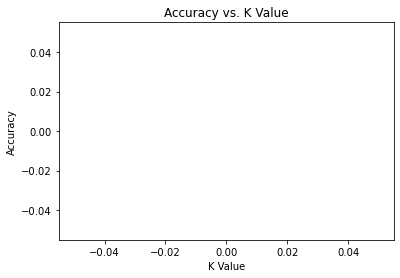

In [5]:
# Create a visualization of the accuracy
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. K Value')
plt.show()

In [9]:

import pandas as pd

# Assuming df is your DataFrame
columns_to_fill = ['age', 'fare']

# Replace null values with mean for specific columns
X_train_scaled[columns_to_fill] = X_train_scaled[columns_to_fill].fillna(X_train_scaled[columns_to_fill].mean())

# Display the DataFrame with null values replaced by mean in specified columns
print(X_train_scaled)


X_train_scaled


        pclass        age     sibsp     parch      fare
772   0.840359  -0.879039 -0.495964 -0.442432 -0.495345
543  -0.355097   0.453610 -0.495964 -0.442432 -0.445056
289  -1.550554  -0.808899 -0.495964  1.795376  0.890274
10   -1.550554   1.225143  0.456833 -0.442432  3.745834
147  -1.550554  29.881135 -0.495964 -0.442432  0.170953
...        ...        ...       ...       ...       ...
1095  0.840359  29.881135 -0.495964 -0.442432 -0.500493
1130  0.840359  -0.808899 -0.495964 -0.442432 -0.497678
1294  0.840359  -0.072436 -0.495964 -0.442432 -0.336916
860   0.840359  -0.247784 -0.495964 -0.442432 -0.494781
1126  0.840359  -0.107505 -0.495964 -0.442432 -0.495345

[1047 rows x 5 columns]


,pclass,age,sibsp,parch,fare
772,0.840359,-0.879039,-0.495964,-0.442432,-0.495345
543,-0.355097,0.453610,-0.495964,-0.442432,-0.445056
289,-1.550554,-0.808899,-0.495964,1.795376,0.890274
10,-1.550554,1.225143,0.456833,-0.442432,3.745834
147,-1.550554,29.881135,-0.495964,-0.442432,0.170953
...,...,...,...,...,...
1095,0.840359,29.881135,-0.495964,-0.442432,-0.500493
1130,0.840359,-0.808899,-0.495964,-0.442432,-0.497678
1294,0.840359,-0.072436,-0.495964,-0.442432,-0.336916
860,0.840359,-0.247784,-0.495964,-0.442432,-0.494781


In [7]:
# Train the final model with the best K value
final_knn_model = KNeighborsClassifier(n_neighbors=best_k)
final_knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

In [10]:
# Assuming df is your DataFrame
columns_to_fill = ['age', 'fare']

# Replace null values with mean for specific columns
X_test_scaled[columns_to_fill] = X_test_scaled[columns_to_fill].fillna(X_test_scaled[columns_to_fill].mean())

# Display the DataFrame with null values replaced by mean in specified columns
print(X_test_scaled)


X_test_scaled


        pclass           age     sibsp     parch      fare
1148  0.848171  2.479371e-01 -0.411054 -0.464832 -0.488250
1049  0.848171 -7.576970e-01  0.586132  0.888346 -0.321072
982   0.848171  9.997397e-17 -0.411054 -0.464832 -0.473295
808   0.848171  9.997397e-17 -0.411054 -0.464832 -0.470303
1195  0.848171  9.997397e-17 -0.411054 -0.464832 -0.476124
...        ...           ...       ...       ...       ...
572  -0.340175 -2.213588e-01 -0.411054 -0.464832 -0.381056
140  -1.528522 -5.565702e-01 -0.411054  0.888346  0.602762
1182  0.848171 -6.906548e-01 -0.411054 -0.464832 -0.478064
312  -1.528522  1.253571e+00  0.586132  0.888346  3.476938
199  -1.528522 -4.895279e-01 -0.411054 -0.464832  0.333972

[262 rows x 5 columns]


,pclass,age,sibsp,parch,fare
1148,0.848171,2.479371e-01,-0.411054,-0.464832,-0.488250
1049,0.848171,-7.576970e-01,0.586132,0.888346,-0.321072
982,0.848171,9.997397e-17,-0.411054,-0.464832,-0.473295
808,0.848171,9.997397e-17,-0.411054,-0.464832,-0.470303
1195,0.848171,9.997397e-17,-0.411054,-0.464832,-0.476124
...,...,...,...,...,...
572,-0.340175,-2.213588e-01,-0.411054,-0.464832,-0.381056
140,-1.528522,-5.565702e-01,-0.411054,0.888346,0.602762
1182,0.848171,-6.906548e-01,-0.411054,-0.464832,-0.478064
312,-1.528522,1.253571e+00,0.586132,0.888346,3.476938


In [11]:
# Evaluate using confusion matrix on the test set
y_pred = final_knn_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[107  37]
 [ 66  52]]
